# Learning Rate

### Experiment with various learning rates and schedules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the function to minimize
def function_to_minimize(x):
    return x**2

# Define the derivative of the function
def derivative(x):
    return 2*x

# Gradient Descent
def gradient_descent(starting_point, learning_rate, iterations):
    x = starting_point
    x_values = [x]
    for _ in range(iterations):
        gradient = derivative(x)
        x = x - learning_rate * gradient
        x_values.append(x)
    return x_values

### Vary Learning Rates

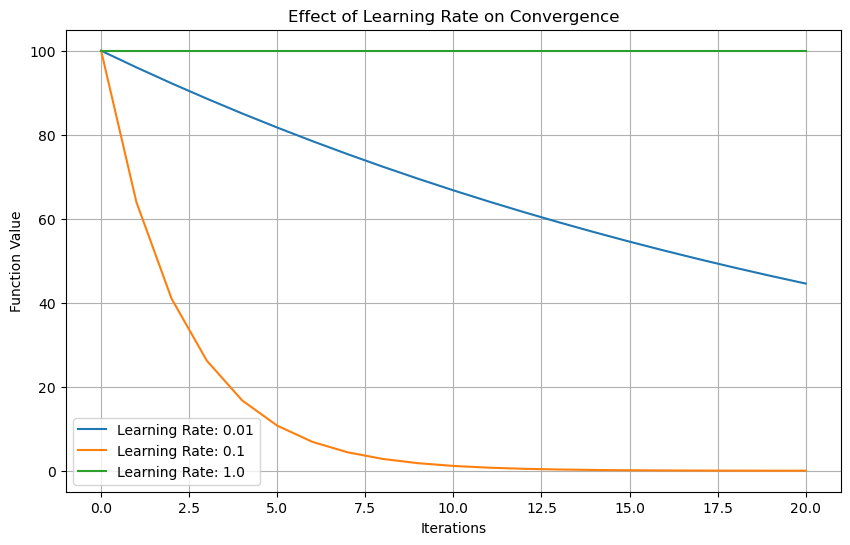

In [3]:
# Initial starting point
starting_point = 10

# Number of iterations
iterations = 20

# Different learning rates to test
learning_rates = [0.01, 0.1, 1.0]

# Perform gradient descent for each learning rate
convergence_data = {}
for lr in learning_rates:
    x_values = gradient_descent(starting_point, lr, iterations)
    convergence_data[lr] = x_values

# Plotting the convergence
plt.figure(figsize=(10, 6))
for lr, x_values in convergence_data.items():
    plt.plot(range(iterations+1), [function_to_minimize(x) for x in x_values], label=f'Learning Rate: {lr}')

plt.xlabel('Iterations')
plt.ylabel('Function Value')
plt.title('Effect of Learning Rate on Convergence')
plt.legend()
plt.grid(True)
plt.show()

### Vary Schedules

In [4]:
# Gradient Descent with various learning rate schedules
def gradient_descent(starting_point, learning_rate_schedule, iterations):
    x = starting_point
    x_values = [x]
    for epoch in range(iterations):
        learning_rate = learning_rate_schedule(epoch)  # Obtain learning rate for the current epoch
        gradient = derivative(x)
        x = x - learning_rate * gradient
        x_values.append(x)
    return x_values


In [7]:
# Learning rate schedules

# Constant Learning Rate Schedule
def constant_learning_rate_schedule(learning_rate):
    """
    Returns a constant learning rate schedule.

    Parameters:
    learning_rate (float): The constant learning rate.

    Returns:
    function: A function that returns the constant learning rate for each epoch.
    """
    def schedule(epoch):
        return learning_rate
    return schedule

# Step Decay Learning Rate Schedule
def step_decay_learning_rate_schedule(initial_lr, decay_factor, decay_epochs):
    """
    Returns a step decay learning rate schedule.

    Parameters:
    initial_lr (float): Initial learning rate.
    decay_factor (float): Factor by which to decay the learning rate.
    decay_epochs (list): List of epochs at which to decay the learning rate.

    Returns:
    function: A function that returns the learning rate for each epoch based on the step decay schedule.
    """
    def schedule(epoch):
        if epoch in decay_epochs:
            return initial_lr * decay_factor
        else:
            return initial_lr
    return schedule

# Exponential Decay Learning Rate Schedule
def exponential_decay_learning_rate_schedule(initial_lr, decay_rate):
    """
    Returns an exponential decay learning rate schedule.

    Parameters:
    initial_lr (float): Initial learning rate.
    decay_rate (float): Rate at which the learning rate decays.

    Returns:
    function: A function that returns the learning rate for each epoch based on the exponential decay schedule.
    """
    def schedule(epoch):
        return initial_lr * (decay_rate ** epoch)
    return schedule

# Inverse Decay Learning Rate Schedule
def inverse_decay_learning_rate_schedule(initial_lr, decay_rate):
    """
    Returns an inverse decay learning rate schedule.

    Parameters:
    initial_lr (float): Initial learning rate.
    decay_rate (float): Rate at which the learning rate decays.

    Returns:
    function: A function that returns the learning rate for each epoch based on the inverse decay schedule.
    """
    def schedule(epoch):
        return initial_lr / (1 + decay_rate * epoch)
    return schedule

# Cosine Annealing Learning Rate Schedule
def cosine_annealing_learning_rate_schedule(initial_lr, min_lr, max_lr, epochs):
    """
    Returns a cosine annealing learning rate schedule.

    Parameters:
    initial_lr (float): Initial learning rate.
    min_lr (float): Minimum learning rate.
    max_lr (float): Maximum learning rate.
    epochs (int): Total number of epochs.

    Returns:
    function: A function that returns the learning rate for each epoch based on the cosine annealing schedule.
    """
    def schedule(epoch):
        return min_lr + 0.5 * (max_lr - min_lr) * (1 + np.cos(epoch / epochs * np.pi))
    return schedule

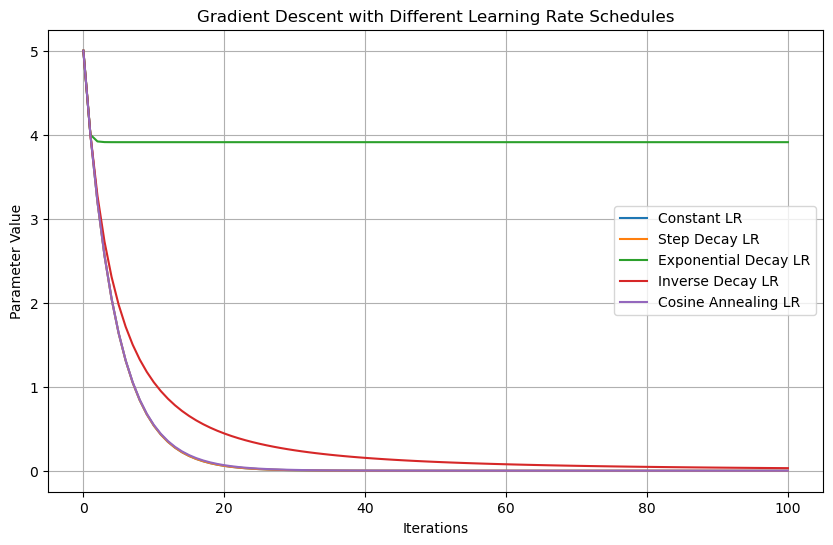

In [8]:
# Example usage
starting_point = 5
iterations = 100
learning_rate = 0.1
decay_factor = 0.5
decay_epochs = [30, 60, 90]
decay_rate = 0.1
min_lr = 0.01
max_lr = 0.1

constant_lr_schedule = constant_learning_rate_schedule(learning_rate)
step_decay_lr_schedule = step_decay_learning_rate_schedule(learning_rate, decay_factor, decay_epochs)
exponential_decay_lr_schedule = exponential_decay_learning_rate_schedule(learning_rate, decay_rate)
inverse_decay_lr_schedule = inverse_decay_learning_rate_schedule(learning_rate, decay_rate)
cosine_annealing_lr_schedule = cosine_annealing_learning_rate_schedule(learning_rate, min_lr, max_lr, iterations)

x_values_constant = gradient_descent(starting_point, constant_lr_schedule, iterations)
x_values_step_decay = gradient_descent(starting_point, step_decay_lr_schedule, iterations)
x_values_exponential_decay = gradient_descent(starting_point, exponential_decay_lr_schedule, iterations)
x_values_inverse_decay = gradient_descent(starting_point, inverse_decay_lr_schedule, iterations)
x_values_cosine_annealing = gradient_descent(starting_point, cosine_annealing_lr_schedule, iterations)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(x_values_constant, label='Constant LR')
plt.plot(x_values_step_decay, label='Step Decay LR')
plt.plot(x_values_exponential_decay, label='Exponential Decay LR')
plt.plot(x_values_inverse_decay, label='Inverse Decay LR')
plt.plot(x_values_cosine_annealing, label='Cosine Annealing LR')
plt.title('Gradient Descent with Different Learning Rate Schedules')
plt.xlabel('Iterations')
plt.ylabel('Parameter Value')
plt.legend()
plt.grid(True)
plt.show()